<a href="https://colab.research.google.com/github/Sreeshu123/Final-year-project--GA/blob/main/fyp_GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pygad

In [ ]:
import pygad


In [ ]:
import random
import numpy as np
import copy
from collections import OrderedDict

In [ ]:
class LO:
    def __init__(self, name, topic, v, a, t, ip, read_metric):
        self.name = name
        self.topic = topic
        self.v = v  # Visual metric
        self.a = a  # Auditory metric
        self.t = t  # Reading/Writing metric
        self.ip = ip  # Information processing metric
        self.read_metric = read_metric # readability score of content (r)


    def __repr__(self):
        return f"{self.name}({self.topic})"

In [ ]:
class student:
    def __init__(self, name, wma, wmv, wmt, ipa, ipv, ipt, read_metric, difficulty_val, gene_space):
        self.name = name
        self.wmv = wmv
        self.wma = wma
        self.wmt = wmt
        self.ipv = ipv
        self.ipa = ipa
        self.ipt = ipt
        self.read_metric = read_metric #rd - readability score

        self.s = wma + wmv + wmt + ipa + ipv + ipt
        self.v = (wmv + ipv)/self.s
        self.a = (wma + ipa)/self.s
        self.t = (wmt + ipt)/self.s
        self.cluster_id= None
        self.difficulty= copy.deepcopy(difficulty_val)
        self.gene_space=copy.deepcopy(gene_space)
        self.completed=[]
        self.learning_costs={}
        self.explored_genes= {}

    def __repr__(self):
        return f"{self.name}"

In [ ]:
class Cluster:
    def __init__(self, centroid):
        self.centroid = centroid  # [v, a, t]
        self.gene_pool = set()   # Set of unique genes in the cluster

    def __repr__(self):
        return f"{self.centroid}\n{self.gene_pool}"

In [ ]:
max_fitness= float('-inf')
avg_fitness=0
sol= np.array([])
c=0 #no of generations algo run for
clusters= []
max_distance= 0.6 #max dist of the cluster


In [ ]:
learning_objects = [
    # Learning Objects for "food" topic
    LO("FO1", "food", 5, 0, 0, 3, 100),
    LO("FO2", "food", 1, 3, 1, 2, 60),
    LO("FO3", "food", 2, 1, 2, 4, 75),
    LO("FO4", "food", 0, 5, 0, 4, 90),
    LO("FO5", "food", 0, 0, 5, 4, 60),


    # Learning Objects for "food sources" topic
    LO("FS1", "food sources", 1, 2, 2, 3, 50),
    LO("FS2", "food sources", 2, 2, 1, 3, 65),
    LO("FS3", "food sources", 5, 0, 0, 4, 100),
    LO("FS4", "food sources", 2, 1, 2, 5, 85),
    LO("FS5", "food sources", 0, 0, 5, 6, 95),
    LO("FS6", "food sources", 2, 2, 1, 4, 80),
    LO("FS7", "food sources", 0, 5, 0, 5, 89),

    # Learning Objects for "components of food" topic
    LO("CF1", "components of food", 1, 3, 1, 3, 75),
    LO("CF2", "components of food", 2, 1, 2, 5, 90),
    LO("CF3", "components of food", 5, 0, 0, 3, 100),
    LO("CF4", "components of food", 0, 5, 0, 4, 100),
    LO("CF5", "components of food", 5, 0, 0, 3, 100),
    LO("CF6", "components of food", 0, 0, 5, 3, 85),


    # Learning Objects for "plant-based" topic
    LO("PB1", "plant-based", 2, 1, 2, 3, 60),
    LO("PB2", "plant-based", 1, 2, 2, 2, 50),
    LO("PB3", "plant-based", 5, 0, 0, 3, 65),
    LO("PB4", "plant-based", 1, 3, 1, 3, 55),
    LO("PB5", "plant-based", 0, 5, 0, 4, 75),
    LO("PB6", "plant-based", 0, 0, 5, 6, 75),

    # Learning Objects for "animal-based" topic
    LO("AB1", "animal-based", 2, 1, 2, 3, 60),
    LO("AB2", "animal-based", 5, 0, 0, 2, 100),
    LO("AB3", "animal-based", 2, 2, 1, 3, 65),
    LO("AB4", "animal-based", 1, 3, 1, 3, 55),
    LO("AB5", "animal-based", 0, 0, 5, 4, 75),
    LO("AB6", "animal-based", 0, 5, 0, 3, 80),


    # Learning Objects for "nutrients" topic
    LO("N1", "nutrients", 0, 0, 5, 4, 70),
    LO("N2", "nutrients", 1, 2, 2, 3, 65),
    LO("N3", "nutrients", 2, 1, 2, 3, 60),
    LO("N4", "nutrients", 5, 0, 0, 3, 100),
    LO("N5", "nutrients", 2, 2, 1, 5, 85),
    LO("N6", "nutrients", 0, 5, 0, 3, 60),

    # Learning Objects for "balanced diet" topic
    LO("B1", "balanced diet", 0, 0, 5, 4, 70),
    LO("B2", "balanced diet", 1, 2, 2, 3, 70),
    LO("B3", "balanced diet", 3, 1, 1, 3, 60),
    LO("B4", "balanced diet", 5, 0, 0, 3, 80),
    LO("B5", "balanced diet", 2, 2, 1, 5, 85),
    LO("B6", "balanced diet", 0, 5, 0, 3, 60),

    # Learning Objects for "deficiency diseases" topic
    LO("D1", "deficiency diseases", 1, 2, 2, 5, 100),
    LO("D2", "deficiency diseases", 2, 2, 1, 3, 65),
    LO("D3", "deficiency diseases", 5, 0, 0, 2, 80),
    LO("D4", "deficiency diseases", 2, 1, 2, 5, 85),
    LO("D5", "deficiency diseases", 0, 0, 5, 4, 95),
    LO("D6", "deficiency diseases", 2, 2, 1, 4, 80),
    LO("D7", "deficiency diseases", 0, 5, 0, 5, 89),

     # Learning Objects for "fats" topic
    LO("F1", "fats", 0, 0, 5, 4, 70),
    LO("F2", "fats", 4, 0, 1, 4, 85),
    LO("F3", "fats", 2, 1, 2, 3, 60),
    LO("F4", "fats", 5, 0, 0, 3, 100),
    LO("F5", "fats", 2, 2, 1, 5, 85),
    LO("F6", "fats", 0, 5, 0, 3, 60),

     # Learning Objects for "proteins" topic
    LO("P1", "proteins", 0, 0, 5, 4, 80),
    LO("P2", "proteins", 1, 2, 2, 3, 65),
    LO("P3", "proteins", 3, 0, 2, 4, 80),
    LO("P4", "proteins", 5, 0, 0, 3, 100),
    LO("P5", "proteins", 2, 2, 1, 5, 85),
    LO("P6", "proteins", 0, 5, 0, 5, 60),

     # Learning Objects for "carbohydrates" topic
    LO("C1", "carbohydrates", 0, 0, 5, 4, 70),
    LO("C2", "carbohydrates", 0, 2, 3, 5, 65),
    LO("C3", "carbohydrates", 4, 1, 0, 3, 90),
    LO("C4", "carbohydrates", 5, 0, 0, 3, 100),
    LO("C5", "carbohydrates", 2, 2, 1, 5, 85),
    LO("C6", "carbohydrates", 0, 5, 0, 3, 60),

]




In [ ]:
#initial topic wise difficulty values
difficulty_val={"food": 2, "food sources":3, "components of food":3, "plant-based":2.5, "animal-based":2.5, "nutrients": 3.5, "balanced diet":4, "deficiency diseases":5, "proteins":3, "fats":3, "carbohydrates":3  }

In [ ]:
#Total number of LOs
print(len(learning_objects))

67


In [ ]:

# Group LOs by topic
grouped_los = {}
for lo in range (len(learning_objects)):
    topic=learning_objects[lo].topic
    if topic not in grouped_los:
        grouped_los[topic] = []
    grouped_los[topic].append(lo)




In [ ]:
for i in grouped_los:
    print(i,'-', [learning_objects[j].name for j in grouped_los[i]])
print(grouped_los)


food - ['FO1', 'FO2', 'FO3', 'FO4', 'FO5']
food sources - ['FS1', 'FS2', 'FS3', 'FS4', 'FS5', 'FS6', 'FS7']
components of food - ['CF1', 'CF2', 'CF3', 'CF4', 'CF5', 'CF6']
plant-based - ['PB1', 'PB2', 'PB3', 'PB4', 'PB5', 'PB6']
animal-based - ['AB1', 'AB2', 'AB3', 'AB4', 'AB5', 'AB6']
nutrients - ['N1', 'N2', 'N3', 'N4', 'N5', 'N6']
balanced diet - ['B1', 'B2', 'B3', 'B4', 'B5', 'B6']
deficiency diseases - ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']
fats - ['F1', 'F2', 'F3', 'F4', 'F5', 'F6']
proteins - ['P1', 'P2', 'P3', 'P4', 'P5', 'P6']
carbohydrates - ['C1', 'C2', 'C3', 'C4', 'C5', 'C6']
{'food': [0, 1, 2, 3, 4], 'food sources': [5, 6, 7, 8, 9, 10, 11], 'components of food': [12, 13, 14, 15, 16, 17], 'plant-based': [18, 19, 20, 21, 22, 23], 'animal-based': [24, 25, 26, 27, 28, 29], 'nutrients': [30, 31, 32, 33, 34, 35], 'balanced diet': [36, 37, 38, 39, 40, 41], 'deficiency diseases': [42, 43, 44, 45, 46, 47, 48], 'fats': [49, 50, 51, 52, 53, 54], 'proteins': [55, 56, 57, 58, 59, 6

In [ ]:
#Generating a random chromosome
def generate_random_chromosome(grouped_los):
    chromosome = [random.choice(grouped_los[topic]) for topic in grouped_los]
    random.shuffle(chromosome)
    return np.array(chromosome, dtype=int)



In [ ]:
studentA= student("A", 5, 0, 0, 6, 0, 0, 90, difficulty_val, grouped_los) #Auditory learner
print(studentA)

A


In [ ]:
studentB= student("B", 0, 5, 0, 0, 6, 0, 98, difficulty_val, grouped_los) #Visual learner
print(studentB)

B


In [ ]:
studentC= student("C", 2, 5, 4, 5, 6, 2, 80, difficulty_val, grouped_los) #No defined learning style
print(studentC)

C


In [ ]:

def generate_initial_population(pop_size, grouped_los):
    return np.array([generate_random_chromosome(grouped_los) for _ in range(pop_size)])



In [ ]:
#Create a population of 16 chromosomes
initial_population = generate_initial_population(16, grouped_los)
print("Initial population:")
print(initial_population)

Initial population:
[[19 11 53 39 26  1 59 35 48 13 65]
 [ 2 23 62 59 41  7 53 12 42 24 32]
 [31  3 28 64 52  7 39 18 13 57 45]
 [37  6 63 57 28  0 47 51 12 23 31]
 [ 4 60  6 25 62 19 45 15 50 35 41]
 [53 41 45 24 64 17  6 59 19  3 31]
 [11 29 39  3 65 20 30 15 48 57 51]
 [50 40 29 21  5 17 56 32 65  3 45]
 [14 18 25 45  7 41 55 33  2 49 65]
 [18  4 53 43 57 24 62 14 10 39 35]
 [ 2 28 38 18 52 62 59 17  9 33 45]
 [54 57 38 23 29  1  9 45 32 17 63]
 [10  2 35 22 64 25 43 51 15 39 60]
 [24 47 37 51 57 15 23 61  2 33  7]
 [38 16 35  4  8 60 22 53 26 63 45]
 [24 56 53 39 13 30 47 23 63 10  0]]


In [ ]:
from typing import OrderedDict
def add_learning_cost(topic, gene, cost, student):

  explored_genes= student.explored_genes
  # If topic does not exist, create an empty dictionary for it
  if topic not in explored_genes:
      explored_genes[topic] = {}

  # Add gene-cost pair only if gene is not already present
  if gene not in explored_genes[topic]:
      explored_genes[topic][gene] = cost
  explored_genes[topic] = OrderedDict(sorted(explored_genes[topic].items(), key=lambda x: x[1]))

In [ ]:
def fitness_function(random_chromosome, student_curr):
    lc = 0
    lgs = []
    n = len(random_chromosome)

    # Ensure random_chromosome is treated as a list of integers
    random_chromosome = random_chromosome.astype(int)

    for i in random_chromosome:
        lg = learning_cost(i, student_curr)
        lgs.append(lg)

    lc = sum(lgs) / n
    #print('lc=',lc)
    local_learning_costs = [
        (lgs[i - 1] + lgs[i]) / 2 for i in range(1, n)
    ]

    variance = sum([(l - lc) ** 2 for l in local_learning_costs])
    #print('variance=',variance)
    fitness_value = lc + variance
    return -fitness_value


In [ ]:
def learning_cost(i, student_curr):
      lo= learning_objects[i]
      learning_costs= student_curr.learning_costs
      topic=lo.topic
      if(i in learning_costs and learning_costs[i]!=-1):
        return learning_costs[i]
      else:
        wr = 0
        rd = student_curr.read_metric
        r = lo.read_metric
        d = student_curr.difficulty[topic]
        if (rd >= r):
          wr = (rd-r)/20

        s = student_curr.s
        v = student_curr.v
        a = student_curr.a
        t = student_curr.t

        #print('v,a,t=',v,a,t)
        tc = lo.t
        ac = lo.a
        vc = lo.v
        #print('tc,ac,vc=',tc,ac,vc)
        wip = 1- (s/30)
        ip = lo.ip
        #print('wip,ip=',wip,ip)
        #print('d,wr=',d,wr)
        lg = d + wr + t*(5- tc) + a*(5- ac) + v*(5- vc) + wip*ip
        learning_costs[i]=lg
        add_learning_cost(topic, int(i), lg, student_curr)
      return lg

In [ ]:
def pmx_crossover(parents, offspring_size, learning_objects):
    offspring = []
    #print(parents, offspring_size)
    parents = parents.tolist()  # Convert numpy array to list for processing
    for _ in range(offspring_size[0]):
        # Randomly select two parents
        parent1, parent2 = random.sample(parents,2)

        # Randomly choose crossover points
        size = len(parent1)
        point1, point2 = sorted(random.sample(range(size), 2))

        # Initialize offspring with placeholders
        child = [-1] * size

        # Copy segment from parent1 to the child
        child[point1:point2 + 1] = parent1[point1:point2 + 1]

        # Track topics already in the crossed section
        used_topics = {learning_objects[int(gene)].topic for gene in child[point1:point2 + 1] if gene != -1}

        # Add genes from parent2 that do not duplicate topics in the crossed section
        for idx in range(size):
            if idx < point1 or idx > point2:  # Consider only indices outside the crossed section
                candidate = parent2[idx]
                candidate_topic = learning_objects[int(candidate)].topic

                if candidate_topic not in used_topics:
                    child[idx] = candidate
                    used_topics.add(candidate_topic)

        # Fill any remaining empty slots (`-1`) with unused genes from parent2
        for idx in range(size):
            if child[idx] == -1:
                for candidate in parent2:
                    candidate_topic = learning_objects[int(candidate)].topic
                    if candidate_topic not in used_topics:
                        child[idx] = candidate
                        used_topics.add(candidate_topic)
                        break

        # Append the generated child to the offspring list
        offspring.append(child)
    #print(offspring)
    # Convert offspring to a numpy array before returning
    return np.array(offspring)

In [ ]:
def mutate_gene(solution, mutation_probability, student_curr, learning_objects):
    if np.random.rand() < mutation_probability:  # Apply mutation based on probability
        # Pick a random index in the solution
        idx = np.random.randint(0, len(solution))
        current_gene = solution[idx]
        current_topic = learning_objects[int(current_gene)].topic

        # Replace with a random LO of the same topic
        solution[idx] = random.choice(student_curr.gene_space[current_topic])

    return solution


In [ ]:
def mutation(offspring, ga_instance, student_curr):

    mutation_probability = ga_instance.prob  # Example mutation probability
    #print("mutation")
    for idx in range(offspring.shape[0]):  # Iterate over each chromosome
        # Apply custom mutation logic for the chromosome
        offspring[idx] = mutate_gene(
            solution=offspring[idx],
            mutation_probability=mutation_probability,
            student_curr= student_curr,
            learning_objects= learning_objects
        )

    return offspring


In [ ]:
def repair(chromosome, dependency_graph, learning_objects):

    # Convert chromosome to a list for processing
    chromosome = chromosome.tolist()

    # Extract topics from the chromosome
    topics = [learning_objects[int(gene)].topic for gene in chromosome]

    # Perform a topological sort on the dependency graph
    in_degree = {topic: 0 for topic in dependency_graph}
    for deps in dependency_graph.values():
        for dep in deps:
            in_degree[dep] += 1

    # Queue for topics with no dependencies
    queue = [topic for topic in in_degree if in_degree[topic] == 0]
    topo_sort = []

    while queue:
        # Randomly shuffle the queue to allow different valid orders
        random.shuffle(queue)
        topic = queue.pop(0)
        topo_sort.append(topic)

        for dependent in dependency_graph[topic]:
            in_degree[dependent] -= 1
            if in_degree[dependent] == 0:
                queue.append(dependent)

    # Map topics to their position in the topological order
    topic_to_index = {topic: i for i, topic in enumerate(topo_sort)}

    # Reorder the chromosome to match the topological order
    repaired_chromosome = sorted(chromosome, key=lambda gene: topic_to_index[learning_objects[int(gene)].topic])

    # Convert back to NumPy array and return
    return np.array(repaired_chromosome)


In [ ]:
def repair_trial(chromosome, dependency_graph, learning_objects, student_curr):

    # Convert chromosome to a list for processing
    chromosome = chromosome.tolist()

    # Extract topics from the chromosome
    topics = [learning_objects[int(gene)].topic for gene in chromosome]

    # Perform a topological sort on the dependency graph
    in_degree = {topic: 0 for topic in dependency_graph}
    for deps in dependency_graph.values():
        for dep in deps:
            in_degree[dep] += 1

    # Queue for topics with no dependencies
    queue = [topic for topic in in_degree if in_degree[topic] == 0]
    topo_sort = []

    while queue:
        # Sort the queue by difficulty from the student's perspective
        queue.sort(key=lambda topic: student_curr.difficulty.get(topic, float('inf')))

        # Pop the topic with the lowest difficulty
        topic = queue.pop(0)
        topo_sort.append(topic)

        for dependent in dependency_graph[topic]:
            in_degree[dependent] -= 1
            if in_degree[dependent] == 0:
                queue.append(dependent)

    # Map topics to their position in the topological order
    topic_to_index = {topic: i for i, topic in enumerate(topo_sort)}

    # Reorder the chromosome to match the topological order
    repaired_chromosome = sorted(chromosome, key=lambda gene: topic_to_index[learning_objects[int(gene)].topic])

    # Convert back to NumPy array and return
    return np.array(repaired_chromosome)


In [ ]:
def on_generation(ga_instance):
    #Functions to be performed at the end of every generation
    # Access the population
    population = ga_instance.population
    #print("repair")
    # Dependency graph
    dependency_graph = {
        "food": ["food sources", "components of food"],
        "plant-based": [],
        "animal-based": [],
        "food sources": ["plant-based", "animal-based"],
        "components of food": ["nutrients"],
        "nutrients": ["fats", "carbohydrates", "proteins"],
        "carbohydrates": ["balanced diet"],
        "fats": ["balanced diet"],
        "proteins": ["balanced diet"],
        "balanced diet": ["deficiency diseases"],
        "deficiency diseases": []
        }

    # Repair each chromosome in the population
    global student1
    for i in range(len(population)):
        population[i] = repair_trial(population[i], dependency_graph, learning_objects, student1)

    # Update the population in the GA instance
    ga_instance.population = population

    best_solution, best_fitness, _ = ga_instance.best_solution()
    print(f"Generation {ga_instance.generations_completed}: Best Fitness = {best_fitness}, Best Solution = {best_solution}")
    global max_fitness, sol, avg_fitness, c
    c=c+1
    avg_fitness=avg_fitness+best_fitness
    if(max_fitness< best_fitness):
      max_fitness= best_fitness
      sol= best_solution


In [ ]:
def fitness_function_wrapper(ga_instance, solution, solution_idx):
    return fitness_function(solution, student1)


In [ ]:
def pmx_crossover_wrapper(parents, offspring_size, ga_instance):
  return pmx_crossover(parents, offspring_size, learning_objects)


In [ ]:
def mutation_wrapper(offspring, ga_instance):
  return mutation(offspring, ga_instance, student1)

In [ ]:
max_fitness=float('-inf')
avg_fitness= 0
c=0
#Algorithm is run for student C
student1=studentC
ga_instance1 = pygad.GA(
    initial_population= initial_population,
    num_generations=1000,
    num_parents_mating=10,
    fitness_func=fitness_function_wrapper,
    sol_per_pop=16,
    parent_selection_type= 'rws',
    crossover_type=pmx_crossover_wrapper,  # Pass the PMX crossover function directly
    mutation_type=mutation_wrapper,  # Use your custom mutation function
    on_generation=on_generation, # Ensure this function repairs chromosomes
    keep_elitism=1
)

ga_instance1.prob=0.7
ga_instance1.run()

Generation 1: Best Fitness = -9.179048151974289, Best Solution = [ 2.  9. 18. 28. 17. 33. 53. 62. 58. 39. 45.]
Generation 2: Best Fitness = -8.828795052800732, Best Solution = [ 2.  9. 18. 28. 16. 35. 53. 62. 58. 39. 44.]
Generation 3: Best Fitness = -8.828795052800732, Best Solution = [ 2.  9. 18. 28. 16. 35. 53. 62. 58. 39. 44.]
Generation 4: Best Fitness = -8.828795052800732, Best Solution = [ 2.  9. 18. 28. 16. 35. 53. 62. 58. 39. 44.]
Generation 5: Best Fitness = -8.140890438475665, Best Solution = [ 2.  9. 18. 28. 12. 35. 52. 62. 59. 39. 44.]
Generation 6: Best Fitness = -8.140890438475665, Best Solution = [ 2.  9. 18. 28. 12. 35. 52. 62. 59. 39. 44.]
Generation 7: Best Fitness = -8.140890438475665, Best Solution = [ 2.  9. 18. 28. 12. 35. 52. 62. 59. 39. 44.]
Generation 8: Best Fitness = -8.140890438475665, Best Solution = [ 2.  9. 18. 28. 12. 35. 52. 62. 59. 39. 44.]
Generation 9: Best Fitness = -8.140890438475665, Best Solution = [ 2.  9. 18. 28. 12. 35. 52. 62. 59. 39. 44.]
G

Best solution: [ 1.  8. 22. 26. 17. 33. 53. 65. 57. 39. 44.]
Best_fitness: -7.569972595270891
avg_fitness= -7.66694547905031
1 - 1 3 1 ( food ) - 2
8 - 2 1 2 ( food sources ) - 3
22 - 0 5 0 ( plant-based ) - 2.5
26 - 2 2 1 ( animal-based ) - 2.5
17 - 0 0 5 ( components of food ) - 3
33 - 5 0 0 ( nutrients ) - 3.5
53 - 2 2 1 ( fats ) - 3
65 - 2 2 1 ( carbohydrates ) - 3
57 - 3 0 2 ( proteins ) - 3
39 - 5 0 0 ( balanced diet ) - 4
44 - 5 0 0 ( deficiency diseases ) - 5


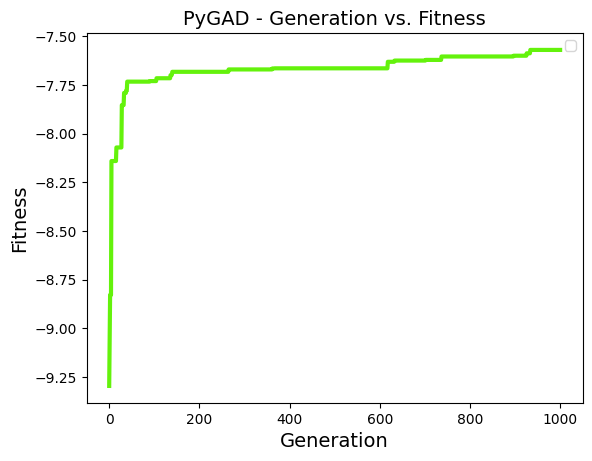

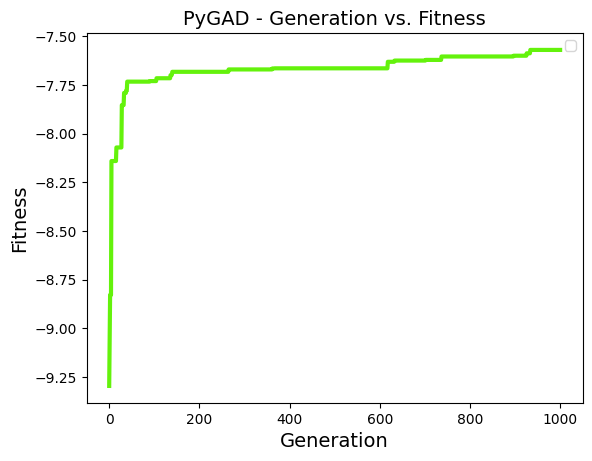

In [ ]:
# Best solution
best_solution, best_fitness, _ = ga_instance1.best_solution()
avg_fitness=avg_fitness+best_fitness
c=c+1
avg_fitness=avg_fitness/c
if(best_fitness> max_fitness):
  max_fitness= best_fitness
  sol= best_solution

print("Best solution:", sol)
print("Best_fitness:", max_fitness)
print('avg_fitness=',avg_fitness)
for i in best_solution:
  topic= learning_objects[int(i)].topic
  print (int(i), '-', learning_objects[int(i)].v, learning_objects[int(i)].a, learning_objects[int(i)].t,'(',topic, ')', '-', student1.difficulty[topic] )
# Visualize the fitness evolution
ga_instance1.plot_fitness()


OPTIMIZATION


In [ ]:
def cluster_assignment(student_curr, clusters, max_distance):
  #Assumes no cluster assigned previously to the student
  student_profile = np.array([student_curr.v, student_curr.a, student_curr.t])
  assigned = False

  # Find the closest cluster within max_distance
  for cluster_id, cluster in enumerate(clusters):
    #Manhattan distance
      distance = np.sum(np.abs(student_profile - cluster.centroid))
      if distance <= max_distance:
          # Update centroid
          cluster.centroid = np.mean([cluster.centroid] + [student_profile], axis=0)
          student_curr.cluster_id = cluster_id  # Assign cluster ID to the student
          assigned = True
          gene_pool= cluster.gene_pool
          break

  # If no suitable cluster, create a new one
  if not assigned:
      new_cluster = Cluster(centroid=student_profile)
      clusters.append(new_cluster)
      student_curr.cluster_id = len(clusters) - 1  # Assign the new cluster ID to the student
      gene_pool=None
  return student_curr.cluster_id, assigned


In [ ]:
def get_initial_population(student_curr, clusters):
  #Gene space of student is assumed to contain atleast one gene for each topic
  #Grouped_los and learning objects are the universal ones
  gene_pool=clusters[int(student_curr.cluster_id)].gene_pool
  gene_space=student_curr.gene_space
  grouped_genes={}
  for topic in gene_space:
    grouped_genes[topic]= []
    for gene in gene_space[topic]:
      if int(gene) in gene_pool:
        grouped_genes[topic].append(gene)
    if not grouped_genes[topic]:
      grouped_genes[topic]=gene_space[topic]

  return generate_initial_population(16, grouped_genes)


In [ ]:
def generate_path(student_curr, initial_pop, num_gen):


  global max_fitness, avg_fitness, c, sol
  max_fitness=float('-inf')
  avg_fitness= 0
  c=0
  ga_instance = pygad.GA(
      initial_population= initial_pop,
      num_generations=num_gen,
      num_parents_mating=10,
      fitness_func=fitness_function_wrapper,
      sol_per_pop=16,
      parent_selection_type= 'rws',
      crossover_type=pmx_crossover_wrapper,  # Pass the PMX crossover function directly
      mutation_type=mutation_wrapper,  # Use your custom mutation function
      on_generation=on_generation, # Ensure this function repairs chromosomes
      keep_elitism=1
  )

  ga_instance.prob=0.7
  ga_instance.run()


  # Best solution
  best_solution, best_fitness, _ = ga_instance.best_solution()
  avg_fitness=avg_fitness+best_fitness
  c=c+1
  avg_fitness=avg_fitness/c
  if(best_fitness> max_fitness):
    max_fitness= best_fitness
    sol= best_solution

  print("Best solution:", sol)
  print("Best_fitness:", max_fitness)
  print('avg_fitness=',avg_fitness)
  for i in best_solution:
    topic= learning_objects[int(i)].topic
    print (int(i), '-', learning_objects[int(i)].v, learning_objects[int(i)].a, learning_objects[int(i)].t,'(',topic, ')', '-', student_curr.difficulty[topic] )
  # Visualize the fitness evolution
  ga_instance.plot_fitness()
  return max_fitness, sol




In [ ]:
def add_path(student_curr, path, clusters):
  c=int(student_curr.cluster_id)
  cluster=clusters[c]
  cluster.gene_pool.update(path)



In [ ]:
student1=studentC
print("student:", student1)
cluster_id, assigned= cluster_assignment(student1, clusters, max_distance)
if(assigned):
  print("Student added to cluster:", cluster_id)
  num_gen=500
else:
  print("New cluster created for the student:", cluster_id)
  num_gen=1000

initial_pop= get_initial_population(student1, clusters)
print("initial_population:")
print(initial_pop)


student: C
New cluster created for the student: 0
initial_population:
[[24 30  5  2 36 44 16 21 62 57 51]
 [62 14 53 57 22 48 41  1 11 30 29]
 [22 47  5  1 62 57 26 33 54 39 15]
 [26 66 34 53 11 36 22 13 44  1 59]
 [43 57 36 10 12  3 19 29 32 54 65]
 [39 19 54 31 16 57  0 65  7 43 29]
 [26 55 43 62 22 39  3 31  7 52 13]
 [64 15 26 56 42 53 18 33 10  3 38]
 [ 4 28 52 62 13 55  5 44 38 18 32]
 [26 52  5 31 66 42 38 23  1 58 16]
 [15 32 28 19 57 54 65 10 47  0 39]
 [21 11 12 28  4 66 33 60 42 38 54]
 [23 32 56 15 65 41  8 43 53 28  4]
 [44 31 19 38 62  0 28 56  5 53 12]
 [56 49  0 17 45 66 20 40 34 29 11]
 [37 26  4 60 54 16 21 65 35 11 48]]


Generation 1: Best Fitness = -9.552780503902664, Best Solution = [ 1. 11. 22. 26. 13. 34. 53. 66. 59. 36. 44.]
Generation 2: Best Fitness = -8.98719496097337, Best Solution = [ 1. 11. 22. 26. 13. 34. 53. 66. 59. 36. 44.]
Generation 3: Best Fitness = -8.230798611111112, Best Solution = [ 3.  5. 22. 26. 13. 31. 53. 66. 55. 39. 44.]
Generation 4: Best Fitness = -8.230798611111112, Best Solution = [ 3.  5. 22. 26. 13. 31. 53. 66. 55. 39. 44.]
Generation 5: Best Fitness = -8.230798611111112, Best Solution = [ 3.  5. 22. 26. 13. 31. 53. 66. 55. 39. 44.]
Generation 6: Best Fitness = -8.230798611111112, Best Solution = [ 3.  5. 22. 26. 13. 31. 53. 66. 55. 39. 44.]
Generation 7: Best Fitness = -8.230798611111112, Best Solution = [ 3.  5. 22. 26. 13. 31. 53. 66. 55. 39. 44.]
Generation 8: Best Fitness = -8.230798611111112, Best Solution = [ 3.  5. 22. 26. 13. 31. 53. 66. 55. 39. 44.]
Generation 9: Best Fitness = -8.230798611111112, Best Solution = [ 3.  5. 22. 26. 13. 31. 53. 66. 55. 39. 44.]
Ge

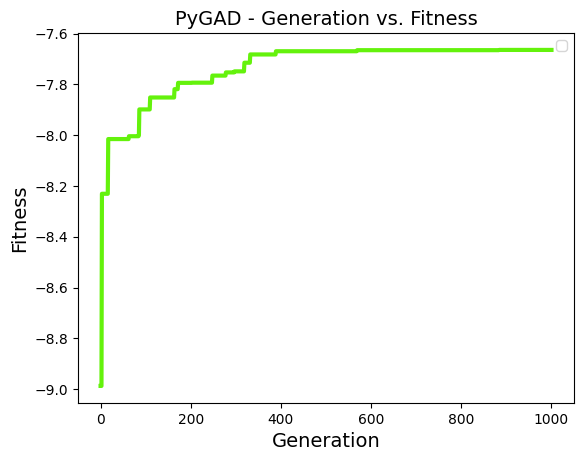

In [ ]:
fitness, path= generate_path(student1, initial_pop, num_gen)


In [ ]:
print('path generated:',path)
print('clusters previously:',clusters)
add_path(student1, path, clusters)
print('Clusters after adding new path:', clusters)

path generated: [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
clusters previously: [[0.45833333 0.29166667 0.25      ]
set()]
Clusters after adding new path: [[0.45833333 0.29166667 0.25      ]
{np.float64(1.0), np.float64(34.0), np.float64(39.0), np.float64(11.0), np.float64(12.0), np.float64(44.0), np.float64(18.0), np.float64(50.0), np.float64(57.0), np.float64(28.0), np.float64(61.0)}]


In [ ]:
studentD= student("D", 2, 5, 4, 6, 6, 2, 90, difficulty_val, grouped_los) #No defined learning style
print(studentD)

D


In [ ]:
student1=studentD
print("student:", student1)
cluster_id, assigned= cluster_assignment(student1, clusters, max_distance)
if(assigned):
  print("Student added to cluster:", cluster_id)
  num_gen=500
else:
  print("New cluster created for the student:", cluster_id)
  num_gen=1000

initial_pop= get_initial_population(student1, clusters)
print("initial_population:")
print(initial_pop)

student: D
Student added to cluster: 0
initial_population:
[[34 50 28 18 39 44  1 61 57 12 11]
 [11 39 61 50 44 34 18 12 28 57  1]
 [12 28 61  1 57 18 50 34 44 39 11]
 [18 57 11  1 34 50 12 61 44 28 39]
 [50 61 44 34 28 12  1 18 57 39 11]
 [34 50 39 57 28 12  1 44 11 18 61]
 [57 12  1 34 28 11 39 44 50 18 61]
 [39 57 12 61 18 34  1 50 44 28 11]
 [61 34 11 12 18 44 28  1 50 39 57]
 [ 1 44 57 50 18 28 61 39 11 34 12]
 [28 12 57  1 61 18 34 11 50 39 44]
 [44 57 34 12  1 39 50 18 61 11 28]
 [11 12 39 34  1 61 44 18 57 28 50]
 [39 12 18 57 28  1 11 44 50 61 34]
 [61 12 39 44 11 57 50 34 18  1 28]
 [ 1 50 61 57 28 44 34 12 11 18 39]]


Generation 1: Best Fitness = -8.355423875114786, Best Solution = [ 1. 11. 18. 28. 12. 34. 53. 61. 57. 39. 44.]
Generation 2: Best Fitness = -8.04235142332415, Best Solution = [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
Generation 3: Best Fitness = -8.04235142332415, Best Solution = [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
Generation 4: Best Fitness = -8.04235142332415, Best Solution = [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
Generation 5: Best Fitness = -8.04235142332415, Best Solution = [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
Generation 6: Best Fitness = -8.04235142332415, Best Solution = [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
Generation 7: Best Fitness = -8.04235142332415, Best Solution = [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
Generation 8: Best Fitness = -8.04235142332415, Best Solution = [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
Generation 9: Best Fitness = -8.04235142332415, Best Solution = [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
Generatio

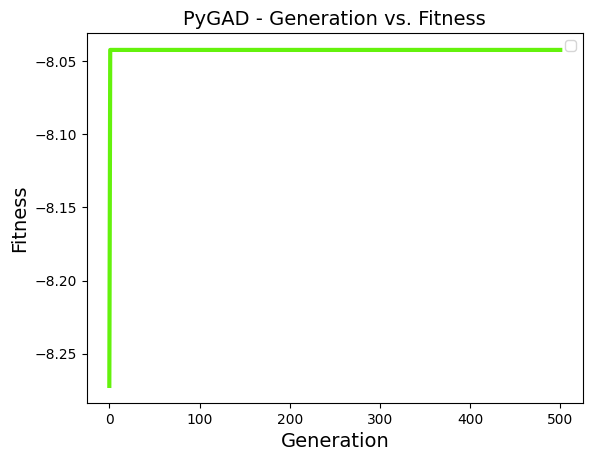

In [ ]:
fitness, path= generate_path(student1, initial_pop, num_gen)

In [ ]:
print('path generated:',path)
print('clusters previously:',clusters)
add_path(student1, path, clusters)
print('Clusters after adding new path:', clusters)

path generated: [ 1. 11. 18. 28. 12. 34. 50. 61. 57. 39. 44.]
clusters previously: [[0.44916667 0.30583333 0.245     ]
{np.float64(1.0), np.float64(34.0), np.float64(39.0), np.float64(11.0), np.float64(12.0), np.float64(44.0), np.float64(18.0), np.float64(50.0), np.float64(57.0), np.float64(28.0), np.float64(61.0)}]
Clusters after adding new path: [[0.44916667 0.30583333 0.245     ]
{np.float64(1.0), np.float64(34.0), np.float64(39.0), np.float64(11.0), np.float64(12.0), np.float64(44.0), np.float64(18.0), np.float64(50.0), np.float64(57.0), np.float64(28.0), np.float64(61.0)}]


ASSESSMENT

In [ ]:
def get_path(student_curr, clusters, max_distance, num_gen, learning_objects):
  if student_curr.cluster_id is None:
    cluster_id, assigned= cluster_assignment(student_curr,clusters, max_distance)

  #if assigned is false => then new cluster created
  initial_pop=get_initial_population(student_curr,clusters)
  print("initial_population:")
  print(initial_pop)
  fitness, path= generate_path(student_curr,initial_pop, num_gen)
  add_path(student_curr,path, clusters)
  return path



In [ ]:
print("cluster id & iff assigned :", cluster_id , assigned )

cluster id & iff assigned : 0 True


In [ ]:
def update_gene(path, student_curr, topic):
  explored_genes=student_curr.explored_genes[topic]
  path[0]=next(iter(explored_genes))
  return path

In [ ]:
def update_score(student_curr, score, attempts, path, clusters, max_distance, learning_objects):
  topic=learning_objects[int(path[0])].topic

  #test passed
  if(score>=0.8):
    del student_curr.gene_space[topic]
    del student_curr.explored_genes[topic]
    student_curr.completed.append(topic)
    print(topic, "completed!")
    new_path=np.delete(path, 0)
    #end of course
    if not len(new_path):
      print("Course completed!")

    return 0, new_path


  else:
    #remove the gene
    student_curr.gene_space[topic].remove(int(path[0]))
    del student_curr.explored_genes[topic][int(path[0])]
    if not student_curr.gene_space[topic] or not student_curr.explored_genes[topic]:
      print("No more resources available on", topic, "!")
      del student_curr.gene_space[topic]
      del student_curr.explored_genes[topic]
      student_curr.completed.append(topic)
      new_path=np.delete(path, 0)
      if not len(new_path):
        print("Course completed!")
      return 0, new_path
    else:
      if (attempts==1 or attempts==2):
        print("updating gene")
        new_path= update_gene(path, student_curr,topic)
        return 1, new_path
      else:
        print("regenerating path with increased difficulty for the topic")
        d=student_curr.difficulty[topic]
        print("previous difficulty:", d)
        d=d+(1-score)
        if(d>5):
          d=5
        print("updated difficulty:", d)
        student_curr.difficulty[topic]=d
        if(len(path)==1):
          new_path= update_gene(path, student_curr,topic) # only 1 gene needs to be updated not the whole path
        else:
          new_path= get_path(student_curr,clusters, max_distance, 500, learning_objects)
          add_path(student_curr, new_path, clusters)
        return 0, new_path



student: A
initial_population:
[[31 57  5 54 25 62 42 19  3 17 40]
 [58 30 49 23 10 43 37 28 17  1 65]
 [ 9 40 23 52  2 25 15 47 56 61 35]
 [19 29 58 52 15 62 41  5  2 32 42]
 [26 58 21 36 64 51  6 32 48  2 12]
 [ 7  1 64 13 32 51 20 38 46 60 28]
 [17 36 34 44 26  4 59 54 63 20  5]
 [34 19  9  3 64 45 40 17 26 58 50]
 [52 33 60 62  0 19 26 42 12  8 36]
 [25 57 44 19  4 12 33 41  9 61 53]
 [22 45  8 37 54  0 59 24 31 61 17]
 [ 3 53 19 64 25 17 30 60  6 46 40]
 [ 6 31 36 59 44  2 49 15 21 27 66]
 [54 30 23  4 37 63 45 17 26 58  9]
 [52 44 60 37 27 63 17 31  0 23 10]
 [55 53 20 39  4 61 17 43 10 27 35]]
Generation 1: Best Fitness = -14.575903925619844, Best Solution = [ 4.  6. 20. 25. 17. 30. 53. 62. 55. 39. 43.]
Generation 2: Best Fitness = -14.080832759412301, Best Solution = [ 0.  8. 22. 24. 17. 31. 50. 61. 59. 40. 45.]
Generation 3: Best Fitness = -14.080832759412301, Best Solution = [ 0.  8. 22. 24. 17. 31. 50. 61. 59. 40. 45.]
Generation 4: Best Fitness = -14.080832759412301, Best S

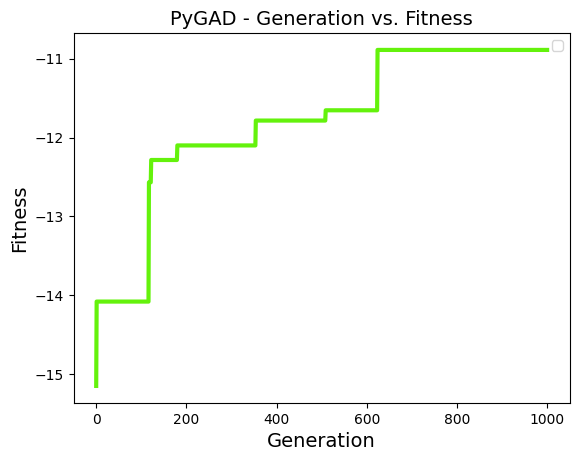

Genes explored:
nutrients : OrderedDict([(35, 6.9), (31, 9.65), (34, 9.916666666666666), (33, 10.4), (32, 10.9), (30, 12.033333333333333)])
proteins : OrderedDict([(60, 7.666666666666666), (56, 9.15), (59, 9.416666666666666), (58, 9.9), (57, 11.033333333333333), (55, 11.033333333333333)])
food sources : OrderedDict([(11, 6.216666666666667), (10, 9.033333333333333), (6, 9.15), (5, 9.9), (8, 10.416666666666666), (7, 10.533333333333333), (9, 11.8)])
fats : OrderedDict([(54, 6.4), (53, 9.416666666666666), (52, 9.9), (51, 10.4), (50, 10.783333333333333), (49, 11.533333333333333)])
animal-based : OrderedDict([(29, 4.9), (27, 8.15), (26, 8.65), (25, 8.766666666666666), (24, 9.9), (28, 10.783333333333333)])
carbohydrates : OrderedDict([(66, 6.4), (63, 8.9), (65, 9.416666666666666), (64, 9.9), (62, 10.416666666666666), (61, 11.533333333333333)])
deficiency diseases : OrderedDict([(48, 8.216666666666667), (47, 11.033333333333333), (43, 11.15), (42, 11.166666666666666), (44, 11.766666666666666), 

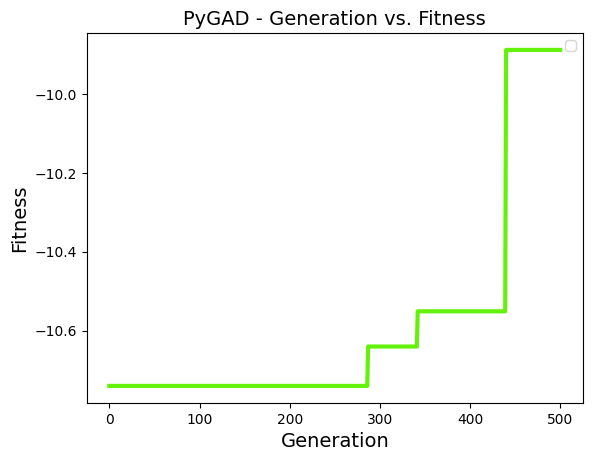

[15.  7. 22. 28. 35. 51. 66. 59. 41. 43.]
topic, score: components of food 0.8
attempt: 1
components of food completed!
[ 7. 22. 28. 35. 51. 66. 59. 41. 43.]
topic, score: food sources 0.5
attempt: 1
updating gene
[ 6. 22. 28. 35. 51. 66. 59. 41. 43.]
topic, score: food sources 0.8
attempt: 2
food sources completed!
[22. 28. 35. 51. 66. 59. 41. 43.]
topic, score: plant-based 0.9
attempt: 1
plant-based completed!
[28. 35. 51. 66. 59. 41. 43.]
topic, score: animal-based 0.7
attempt: 1
updating gene
[29. 35. 51. 66. 59. 41. 43.]
topic, score: animal-based 0.9
attempt: 2
animal-based completed!
[35. 51. 66. 59. 41. 43.]
topic, score: nutrients 0.1
attempt: 1
updating gene
[31. 51. 66. 59. 41. 43.]
topic, score: nutrients 0.2
attempt: 2
updating gene
[34. 51. 66. 59. 41. 43.]
topic, score: nutrients 1.0
attempt: 3
nutrients completed!
[51. 66. 59. 41. 43.]
topic, score: fats 0.2
attempt: 1
updating gene
[54. 66. 59. 41. 43.]
topic, score: fats 0.7
attempt: 2
updating gene
[53. 66. 59. 41. 4

In [ ]:
#Trial run for a student
student1=studentA
print("student:", student1)
path= get_path(student1, clusters, max_distance, 1000, learning_objects)
print("Genes explored:")
for topic in student1.explored_genes:
  print(topic , ":", student1.explored_genes[topic])
prev=0
attempts=0
while(len(path)):
  print(path)
  #path[0] is taught
  #assessment on the topic is taken
  topic=learning_objects[int(path[0])].topic
  attempts=attempts+1
  score= round(random.uniform(prev,1),1)
  prev=score
  print("topic, score:",topic, score)
  print("attempt:",attempts)
  r, path= update_score(student1, score, attempts, path, clusters, max_distance, learning_objects)
  #reset
  if not r:
    attempts=0
    prev=0

In [ ]:
student1.difficulty

{'food': 2,
 'food sources': 3.3,
 'components of food': 3,
 'plant-based': 2.5,
 'animal-based': 2.5,
 'nutrients': 3.5,
 'balanced diet': 4,
 'deficiency diseases': 5,
 'proteins': 3,
 'fats': 3,
 'carbohydrates': 3}

student: B
initial_population:
[[59 13 54 40  1 19 48 27 63  6 35]
 [47 17 37  2 10 64 50 55 26 31 19]
 [ 3 47 21 66 57 36 49 33 25 16  5]
 [11 15  0 31 61 45 28 53 41 57 21]
 [23 24 38 30 46 55  5 66 49 12  1]
 [17  0 49 32 62  6 21 46 36 57 24]
 [32 50 55 22  3 28 42 14 64  6 36]
 [ 7 58 15 31 61 52  0 20 24 37 46]
 [21 32 39 49 28  8  4 57 66 17 48]
 [59  0 63 35 18 24 13 51 11 45 40]
 [28 38 47 23 30 51 12  3 65 60  9]
 [30 49 48 37 26  2 18  8 65 14 60]
 [39 11 64  3 22 57 15 50 34 24 47]
 [57 64 48 54  2 24 30 38  5 14 18]
 [37 49 60 27 35 18 13 61  5  0 43]
 [29 33 46 13  1 63 56  8 19 50 40]]
Generation 1: Best Fitness = -24.87365472910928, Best Solution = [ 3. 10. 22. 26. 15. 34. 50. 64. 55. 39. 47.]
Generation 2: Best Fitness = -17.627122359963273, Best Solution = [ 3. 11. 22. 24. 15. 34. 50. 64. 57. 39. 47.]
Generation 3: Best Fitness = -17.61597968319559, Best Solution = [ 2. 10. 19. 24. 17. 34. 50. 62. 58. 37. 47.]
Generation 4: Best Fitness = -16.352406450872362, Best Sol

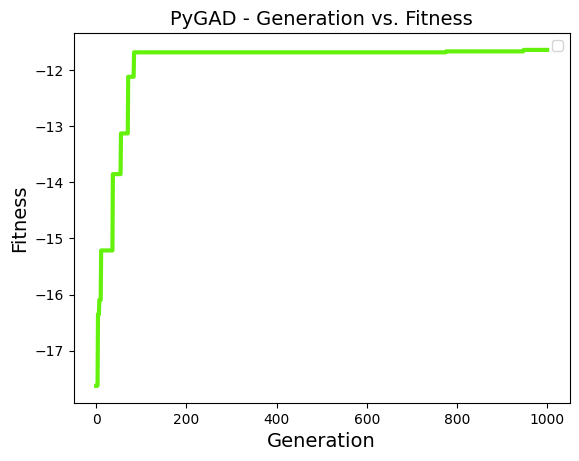

Genes explored:
proteins : OrderedDict([(58, 4.9), (57, 8.433333333333334), (59, 9.816666666666666), (56, 10.55), (55, 11.433333333333334), (60, 13.066666666666666)])
components of food : OrderedDict([(16, 4.9), (14, 4.9), (13, 9.566666666666666), (12, 10.05), (15, 10.533333333333333), (17, 10.55)])
fats : OrderedDict([(52, 4.9), (50, 7.183333333333334), (51, 9.8), (53, 9.816666666666666), (54, 11.8), (49, 11.933333333333334)])
balanced diet : OrderedDict([(39, 6.800000000000001), (38, 9.8), (40, 10.816666666666666), (37, 11.3), (41, 12.8), (36, 12.933333333333334)])
food : OrderedDict([(0, 3.9), (2, 8.683333333333334), (1, 9.166666666666668), (3, 9.933333333333334), (4, 11.433333333333334)])
plant-based : OrderedDict([(20, 6.050000000000001), (18, 9.3), (19, 10.166666666666668), (21, 10.55), (22, 11.183333333333334), (23, 12.45)])
deficiency diseases : OrderedDict([(44, 7.166666666666667), (47, 11.433333333333334), (43, 11.55), (45, 11.816666666666666), (42, 12.166666666666666), (46, 

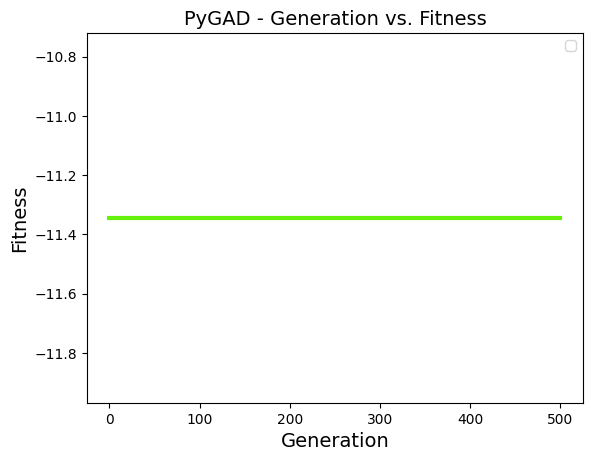

[ 1. 10. 22. 29. 17. 34. 54. 65. 56. 40. 47.]
topic, score: food 0.3
attempt: 1
updating gene
[ 3. 10. 22. 29. 17. 34. 54. 65. 56. 40. 47.]
topic, score: food 0.7
attempt: 2
No more resources available on food !
[10. 22. 29. 17. 34. 54. 65. 56. 40. 47.]
topic, score: food sources 0.0
attempt: 1
updating gene
[ 7. 22. 29. 17. 34. 54. 65. 56. 40. 47.]
topic, score: food sources 0.2
attempt: 2
updating gene
[ 6. 22. 29. 17. 34. 54. 65. 56. 40. 47.]
topic, score: food sources 0.8
attempt: 3
food sources completed!
[22. 29. 17. 34. 54. 65. 56. 40. 47.]
topic, score: plant-based 0.4
attempt: 1
updating gene
[20. 29. 17. 34. 54. 65. 56. 40. 47.]
topic, score: plant-based 0.9
attempt: 2
plant-based completed!
[29. 17. 34. 54. 65. 56. 40. 47.]
topic, score: animal-based 0.9
attempt: 1
animal-based completed!
[17. 34. 54. 65. 56. 40. 47.]
topic, score: components of food 0.3
attempt: 1
updating gene
[16. 34. 54. 65. 56. 40. 47.]
topic, score: components of food 0.9
attempt: 2
components of food 

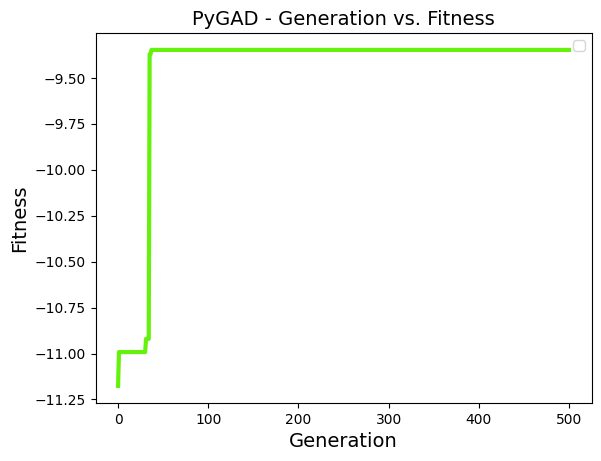

[58. 66. 39. 47.]
topic, score: proteins 0.3
attempt: 1
updating gene
[57. 66. 39. 47.]
topic, score: proteins 0.4
attempt: 2
updating gene
[59. 66. 39. 47.]
topic, score: proteins 0.7
attempt: 3
regenerating path with increased difficulty for the topic
previous difficulty: 3
updated difficulty: 3.3
initial_population:
[[56 66 47 39]
 [66 47 56 40]
 [66 47 56 39]
 [40 66 56 47]
 [47 56 66 39]
 [47 66 56 39]
 [56 39 47 66]
 [47 56 39 66]
 [47 66 39 56]
 [39 47 56 66]
 [56 47 66 39]
 [47 40 56 66]
 [39 66 47 56]
 [47 66 40 56]
 [40 47 56 66]
 [56 40 66 47]]
Generation 1: Best Fitness = -11.06088541666667, Best Solution = [56. 66. 38. 47.]
Generation 2: Best Fitness = -11.176319444444442, Best Solution = [56. 66. 40. 47.]
Generation 3: Best Fitness = -11.065625, Best Solution = [56. 66. 38. 43.]
Generation 4: Best Fitness = -11.065625, Best Solution = [56. 66. 38. 43.]
Generation 5: Best Fitness = -11.06088541666667, Best Solution = [56. 66. 38. 47.]
Generation 6: Best Fitness = -11.06088

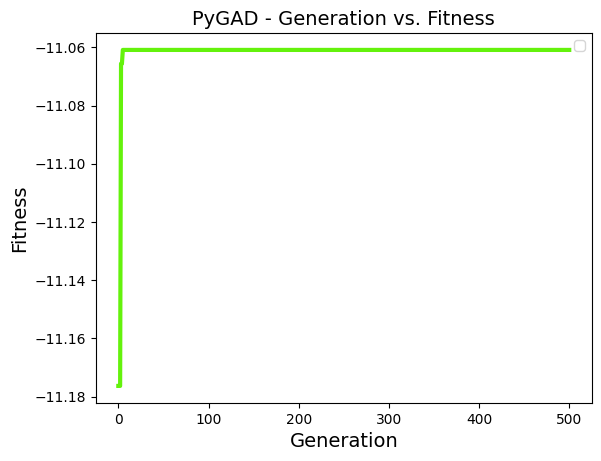

[56. 66. 38. 47.]
topic, score: proteins 0.5
attempt: 1
updating gene
[55. 66. 38. 47.]
topic, score: proteins 0.6
attempt: 2
updating gene
[60. 66. 38. 47.]
topic, score: proteins 0.8
attempt: 3
proteins completed!
[66. 38. 47.]
topic, score: carbohydrates 0.5
attempt: 1
updating gene
[61. 38. 47.]
topic, score: carbohydrates 1.0
attempt: 2
carbohydrates completed!
[38. 47.]
topic, score: balanced diet 0.4
attempt: 1
updating gene
[39. 47.]
topic, score: balanced diet 0.6
attempt: 2
updating gene
[40. 47.]
topic, score: balanced diet 0.6
attempt: 3
regenerating path with increased difficulty for the topic
previous difficulty: 4
updated difficulty: 4.4
initial_population:
[[47 36]
 [47 37]
 [41 47]
 [37 47]
 [47 37]
 [36 47]
 [47 36]
 [47 37]
 [41 47]
 [41 47]
 [41 47]
 [47 37]
 [47 41]
 [37 47]
 [47 41]
 [47 41]]
Generation 1: Best Fitness = -11.366666666666667, Best Solution = [37. 47.]
Generation 2: Best Fitness = -9.983333333333334, Best Solution = [41. 44.]
Generation 3: Best Fitn

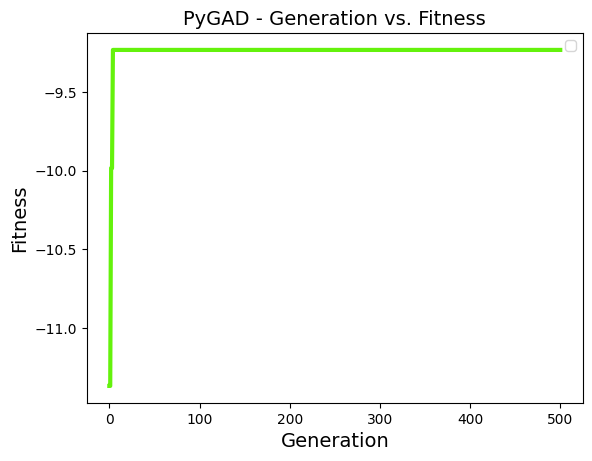

[37. 44.]
topic, score: balanced diet 0.9
attempt: 1
balanced diet completed!
[44.]
topic, score: deficiency diseases 0.7
attempt: 1
updating gene
[47.]
topic, score: deficiency diseases 0.9
attempt: 2
deficiency diseases completed!
Course completed!


In [ ]:
#Trial run for a student
student1=studentB
print("student:", student1)
path= get_path(student1, clusters, max_distance, 1000, learning_objects)
print("Genes explored:")
for topic in student1.explored_genes:
  print(topic , ":", student1.explored_genes[topic])
prev=0
attempts=0
while(len(path)):
  print(path)
  #path[0] is taught
  #assessment on the topic is taken
  topic=learning_objects[int(path[0])].topic
  attempts=attempts+1
  score= round(random.uniform(prev,1),1)
  prev=score
  print("topic, score:",topic, score)
  print("attempt:",attempts)
  r, path= update_score(student1, score, attempts, path, clusters, max_distance, learning_objects)
  if not r:
    attempts=0
    prev=0

In [ ]:
student1.difficulty

{'food': 2.3,
 'food sources': 3,
 'components of food': 3,
 'plant-based': 2.5,
 'animal-based': 2.5,
 'nutrients': 3.5,
 'balanced diet': 4.4,
 'deficiency diseases': 5,
 'proteins': 3.3,
 'fats': 3,
 'carbohydrates': 3.4}